# Connect to Azure ML workspace

In [2]:
import azureml.core
from azureml.core import Workspace
from azureml.core.run import Run
from azureml.core.experiment import Experiment

# Check core SDK version number
print("SDK version:", azureml.core.VERSION)
workspace="league-ws"
subscription_id="79451499-b2c0-4513-8dea-ef7f37173fbb"
resource_grp="league"

experiment_name = "league_predict_temp"
model_name = "leaguepredict.mml" # in case you want to change the name, keep the .mml extension
ws = Workspace(workspace_name = workspace,
               subscription_id = subscription_id,
               resource_group = resource_grp)

ws.get_details()

print('Workspace name: ' + ws.name, 
      'Azure region: ' + ws.location, 
      'Subscription id: ' + ws.subscription_id, 
      'Resource group: ' + ws.resource_group, sep = '\n')

Failure while loading azureml_run_type_providers. Failed to load entrypoint hyperdrive = azureml.train.hyperdrive:HyperDriveRun._from_run_dto with exception (idna 2.1 (/databricks/python3/lib/python3.5/site-packages), Requirement.parse('idna<2.9,>=2.5'), {'requests'}).
Failure while loading azureml_run_type_providers. Failed to load entrypoint azureml.ReusedStepRun = azureml.pipeline.core.run:StepRun._from_reused_dto with exception (idna 2.1 (/databricks/python3/lib/python3.5/site-packages), Requirement.parse('idna<2.9,>=2.5'), {'requests'}).
Failure while loading azureml_run_type_providers. Failed to load entrypoint azureml.PipelineRun = azureml.pipeline.core.run:PipelineRun._from_dto with exception (idna 2.1 (/databricks/python3/lib/python3.5/site-packages), Requirement.parse('idna<2.9,>=2.5'), {'requests'}).
Failure while loading azureml_run_type_providers. Failed to load entrypoint azureml.StepRun = azureml.pipeline.core.run:StepRun._from_dto with exception (idna 2.1 (/databricks/python3/lib/python3.5/site-packages), Requirement.parse('idna<2.9,>=2.5'), {'requests'}).
Failure while loading azureml_run_type_providers. Failed to load entrypoint azureml.scriptrun = azureml.core.script_run:ScriptRun._from_run_dto with exception (idna 2.1 (/databricks/python3/lib/python3.5/site-packages), Requirement.parse('idna<2.9,>=2.5'), {'requests'}).
SDK version: 1.0.74
Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code E6XA8R4YA to authenticate.
Interactive authentication successfully completed.
Workspace name: league-ws
Azure region: northcentralus
Subscription id: 79451499-b2c0-4513-8dea-ef7f37173fbb
Resource group: league

# Read final feature table from cosmos DB

In [4]:
import os
import urllib
import pprint
import numpy as np
import shutil
import time

In [5]:
## Dataset
readConfig = {
"Endpoint" : "https://lolpredict.documents.azure.com:443/",
"Masterkey" : "lAb4WLi89cpXb7jGeMlLZtXUqvlGJip9NtKxDZMWHKUf0wasuAFknSgTxX3M7RAlK2uyFZjau7AJethdaBRDWw==",
"Database" : "league_extraction",
"Collection" : "FINAL_FEATURES_MATRIX_9112", 
}
final_features_matrix = spark.read.format("com.microsoft.azure.cosmosdb.spark").options(**readConfig).load()

In [6]:
pfinal=final_features_matrix.toPandas()

# Machine Learning and save model to Azure workspace

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
list(pfinal.columns)
#Final list of features

Out[ 6 ]: ['100_CARRY_armorperlevel',
 '100_CARRY_attackdamageperlevel',
 '100_CARRY_attackrange',
 '100_CARRY_attackspeed',
 '100_CARRY_avg(assists)',
 '100_CARRY_avg(deaths)',
 '100_CARRY_avg(gold_earned)',
 '100_CARRY_avg(kills)',
 '100_CARRY_avg(totalDamageDealt)',
 '100_CARRY_avg(totalDamageTaken)',
 '100_CARRY_avg(totalMinionsKilled)',
 '100_CARRY_avg(totalTimeCrowdControlDealt)',
 '100_CARRY_avg(visionScore)',
 '100_CARRY_champion_inv',
 '100_CARRY_hpperlevel',
 '100_CARRY_name',
 '100_CARRY_spellblockperlevel',
 '100_CARRY_summonerId_inv',
 '100_JUNGLE_armorperlevel',
 '100_JUNGLE_attackdamageperlevel',
 '100_JUNGLE_attackrange',
 '100_JUNGLE_attackspeed',
 '100_JUNGLE_avg(assists)',
 '100_JUNGLE_avg(deaths)',
 '100_JUNGLE_avg(gold_earned)',
 '100_JUNGLE_avg(kills)',
 '100_JUNGLE_avg(totalDamageDealt)',
 '100_JUNGLE_avg(totalDamageTaken)',
 '100_JUNGLE_avg(totalMinionsKilled)',
 '100_JUNGLE_avg(totalTimeCrowdControlDealt)',
 '100_JUNGLE_avg(visionScore)',
 '100_JUNGLE_champion_inv',
 '100_JUNGLE_hpperlevel',
 '100_JUNGLE_name',
 '100_JUNGLE_spellblockperlevel',
 '100_JUNGLE_summonerId_inv',
 '100_MIDDLE_armorperlevel',
 '100_MIDDLE_attackdamageperlevel',
 '100_MIDDLE_attackrange',
 '100_MIDDLE_attackspeed',
 '100_MIDDLE_avg(assists)',
 '100_MIDDLE_avg(deaths)',
 '100_MIDDLE_avg(gold_earned)',
 '100_MIDDLE_avg(kills)',
 '100_MIDDLE_avg(totalDamageDealt)',
 '100_MIDDLE_avg(totalDamageTaken)',
 '100_MIDDLE_avg(totalMinionsKilled)',
 '100_MIDDLE_avg(totalTimeCrowdControlDealt)',
 '100_MIDDLE_avg(visionScore)',
 '100_MIDDLE_champion_inv',
 '100_MIDDLE_hpperlevel',
 '100_MIDDLE_name',
 '100_MIDDLE_spellblockperlevel',
 '100_MIDDLE_summonerId_inv',
 '100_SUPPORT_armorperlevel',
 '100_SUPPORT_attackdamageperlevel',
 '100_SUPPORT_attackrange',
 '100_SUPPORT_attackspeed',
 '100_SUPPORT_avg(assists)',
 '100_SUPPORT_avg(deaths)',
 '100_SUPPORT_avg(gold_earned)',
 '100_SUPPORT_avg(kills)',
 '100_SUPPORT_avg(totalDamageDealt)',
 '100_SUPPORT_avg(totalDamageTaken)',
 '100_SUPPORT_avg(totalMinionsKilled)',
 '100_SUPPORT_avg(totalTimeCrowdControlDealt)',
 '100_SUPPORT_avg(visionScore)',
 '100_SUPPORT_champion_inv',
 '100_SUPPORT_hpperlevel',
 '100_SUPPORT_name',
 '100_SUPPORT_spellblockperlevel',
 '100_SUPPORT_summonerId_inv',
 '100_TOP_armorperlevel',
 '100_TOP_attackdamageperlevel',
 '100_TOP_attackrange',
 '100_TOP_attackspeed',
 '100_TOP_avg(assists)',
 '100_TOP_avg(deaths)',
 '100_TOP_avg(gold_earned)',
 '100_TOP_avg(kills)',
 '100_TOP_avg(totalDamageDealt)',
 '100_TOP_avg(totalDamageTaken)',
 '100_TOP_avg(totalMinionsKilled)',
 '100_TOP_avg(totalTimeCrowdControlDealt)',
 '100_TOP_avg(visionScore)',
 '100_TOP_champion_inv',
 '100_TOP_hpperlevel',
 '100_TOP_name',
 '100_TOP_spellblockperlevel',
 '100_TOP_summonerId_inv',
 '200_CARRY_armorperlevel',
 '200_CARRY_attackdamageperlevel',
 '200_CARRY_attackrange',
 '200_CARRY_attackspeed',
 '200_CARRY_avg(assists)',
 '200_CARRY_avg(deaths)',
 '200_CARRY_avg(gold_earned)',
 '200_CARRY_avg(kills)',
 '200_CARRY_avg(totalDamageDealt)',
 '200_CARRY_avg(totalDamageTaken)',
 '200_CARRY_avg(totalMinionsKilled)',
 '200_CARRY_avg(totalTimeCrowdControlDealt)',
 '200_CARRY_avg(visionScore)',
 '200_CARRY_champion_inv',
 '200_CARRY_hpperlevel',
 '200_CARRY_name',
 '200_CARRY_spellblockperlevel',
 '200_CARRY_summonerId_inv',
 '200_JUNGLE_armorperlevel',
 '200_JUNGLE_attackdamageperlevel',
 '200_JUNGLE_attackrange',
 '200_JUNGLE_attackspeed',
 '200_JUNGLE_avg(assists)',
 '200_JUNGLE_avg(deaths)',
 '200_JUNGLE_avg(gold_earned)',
 '200_JUNGLE_avg(kills)',
 '200_JUNGLE_avg(totalDamageDealt)',
 '200_JUNGLE_avg(totalDamageTaken)',
 '200_JUNGLE_avg(totalMinionsKilled)',
 '200_JUNGLE_avg(totalTimeCrowdControlDealt)',
 '200_JUNGLE_avg(visionScore)',
 '200_JUNGLE_champion_inv',
 '200_JUNGLE_hpperlevel',
 '200_JUNGLE_name',
 '200_JUNGLE_spellblockperlevel',
 '200_JUNGLE_summonerId_inv',
 '200_MIDDLE_armorperlevel',
 '200_MIDDLE_attackdamageperlevel',
 '200_MIDDLE_attackrange',
 '200_MIDDLE_attackspeed',
 '200_MID

In [10]:
#drop uncessary columns
dropped=[
 '_attachments',
 '_etag',
 '_rid',
 '_self',
 '_ts',
 'id',
 'label',
 'match_id',
 ]
for i in pfinal.columns:
    if i not in dropped:
        if "summonerId_inv" in i or "name" in i or 'champion_inv' in i:
            dropped.append(i)

In [11]:
y=pfinal['label']
x=pfinal.drop(dropped, axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3)
print("There are {} training instances and {} test instance".format(len(x_train),len(x_test)))

There are 6378 training instances and 2734 test instance

In [12]:
model_name="lrm_league_predict.pkl"

In [13]:
from azureml.core import Experiment
experiment = Experiment(workspace=ws, name="league-exp-final")


In [14]:
#Fitting and Predicting with the Logistic Regression Model
from sklearn.externals import joblib
run = experiment.start_logging()
lrm = LogisticRegression(random_state=42)

lrm.fit(x_train,y_train)

predicted=lrm.predict(x_test)
score=lrm.score(x_test,y_test)
score_train = lrm.score(x_train,y_train)
print("Train accuracy:{}".format(score_train))
print("Test accuracy:{}".format(score))


run.log('score', np.float(score))

model_name = "LRM_MODEL_LEAGUE.pkl"
filename = "outputs/" + model_name
joblib.dump(value=lrm, filename=filename)
run.upload_file(name=model_name, path_or_stream=filename)
run.complete()

#This lead to a pickle file in experiment, download the model file and deploy offline using azure

Train accuracy:0.8491690185010975
Test accuracy:0.8299195318215069

In [15]:
#Performance metrics for the model
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

cr=classification_report(y_test, predicted)
print(cr)

cm=confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(cm)

ll=log_loss(y_test,predicted)
print("log-loss is:" + str(ll))

roc_auc=roc_auc_score(y_test, predicted)
print("roc auc is:" + str(roc_auc))




precision recall f1-score support

 0 0.84 0.82 0.83 1365
 1 0.82 0.84 0.83 1369

avg / total 0.83 0.83 0.83 2734

Confusion Matrix:
[[1114 251]
 [ 214 1155]]
log-loss is:5.8744446681
roc auc is:0.829899367737

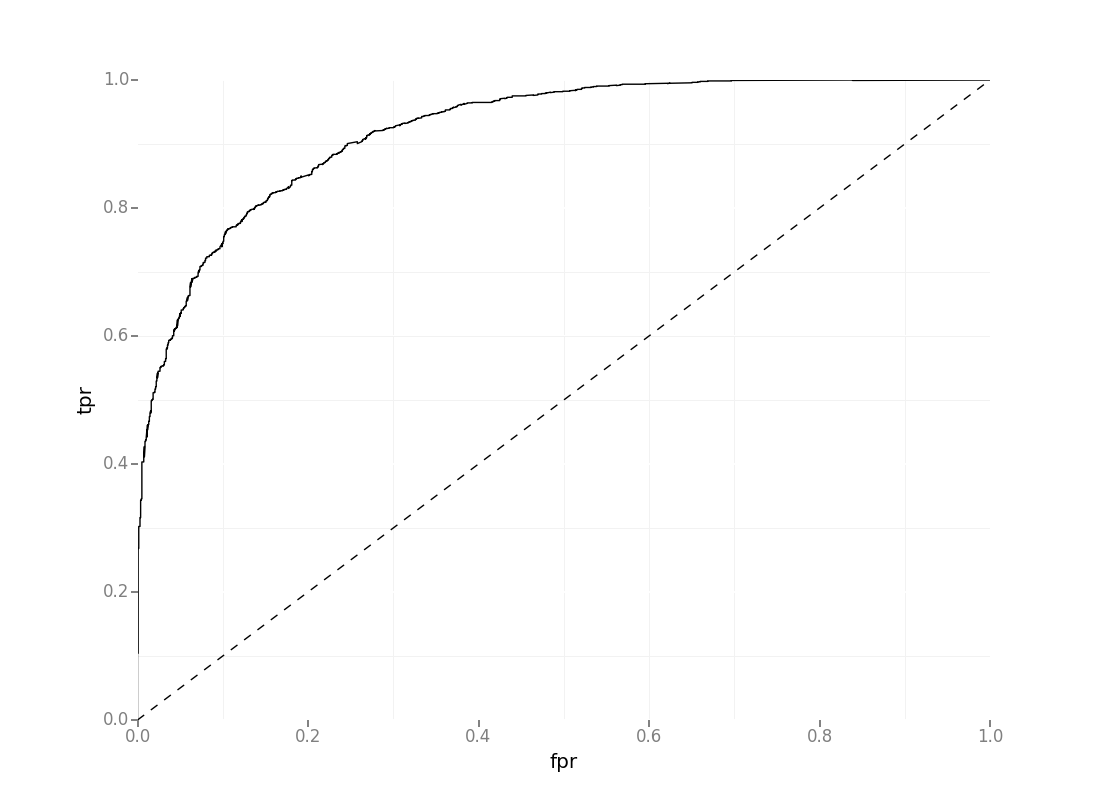

In [16]:
#ROC curve
from ggplot import *
import pandas as pd
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
gp=ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
display(gp)

In [17]:
#Feature Importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score')) 

Specs Score
49 100_SUPPORT_avg(assists) 774.188631
124 200_SUPPORT_avg(assists) 747.563372
20 100_JUNGLE_avg(deaths) 716.060496
95 200_JUNGLE_avg(deaths) 701.548944
21 100_JUNGLE_avg(gold_earned) 625.194108
96 200_JUNGLE_avg(gold_earned) 549.545076
125 200_SUPPORT_avg(deaths) 549.235471
81 200_CARRY_avg(gold_earned) 532.800542
6 100_CARRY_avg(gold_earned) 525.836446
50 100_SUPPORT_avg(deaths) 504.972547